# Tabela Periódica de Investimentos

## *Preparação*

- Essa etapa serve para criar a tabela de exemplo
- Importante destacar que caso você já tenha dados prórpios, para criar a tabela é necessário que a tabela esteja no formato do exemplo com os asset_classes nas linhas e os períodos nas colunas

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import textwrap

# Lista de tickers representando diferentes setores
tickers = {
    'RENDA FIXA': 'BND',
    'LARGE CAP': 'SPY',
    'SMALL CAP': 'IWM',
    'COMMODITIES': 'DBC',
    'TECNOLOGIA': 'XLK',
    'SAÚDE': 'XLV',
    'INDÚSTRIA': 'XLI',
    'FINANCEIRO': 'XLF',
    'ENERGIA': 'XLE',
    'CONSUMO DISCRICIONÁRIO': 'XLY',
    'UTILIDADES': 'XLU'
}


# Baixar os dados de rendimento dos ETFs
data = {}
for sector, ticker in tickers.items():
    data[sector] = yf.download(ticker, period='12y')['Adj Close']

# Criar um DataFrame com os dados baixados
df = pd.DataFrame(data)

asset_classes = df.columns
equal_weight = 1/len(df.columns)


# Calcular os retornos diários
returns = df.pct_change().dropna()
returns['Asset Allocation'] = (returns[asset_classes]*equal_weight).sum(axis=1)


# Calcular o retorno acumulado anual
annual_returns = returns.add(1).resample('Y').prod().sub(1)

# Transformar o índice do ano para um formato mais amigável
annual_returns.index = annual_returns.index.year

#Tabela formatada para criar a periódica
tabela = annual_returns.T

display(tabela) # Apresentando a tabela para mostrar como ela deve estar formatada para o módulo seguinte

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Date,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
RENDA FIXA,-0.004973,-0.021074,0.058178,0.005591,0.025216,0.039994,0.001160,0.088339,0.077151,-0.018611,-0.131122,0.056544,0.006509
LARGE CAP,0.056537,0.323078,0.134638,0.012343,0.119979,0.217054,-0.045690,0.312239,0.183316,0.287287,-0.181754,0.261758,0.162341
SMALL CAP,0.081743,0.386967,0.050363,-0.044789,0.215913,0.145825,-0.111212,0.253898,0.200308,0.145361,-0.204848,0.168277,0.086131
COMMODITIES,0.005429,-0.076314,-0.280982,-0.275881,0.185629,0.048611,-0.116303,0.118392,-0.078370,0.413606,0.193399,-0.061945,0.024501
TECNOLOGIA,0.013068,0.262412,0.178424,0.054692,0.150119,0.342564,-0.016772,0.498559,0.436188,0.347441,-0.277263,0.560184,0.151407
SAÚDE,0.053454,0.414093,0.251364,0.068312,-0.027617,0.217729,0.062800,0.204518,0.132952,0.260386,-0.020793,0.020666,0.092429
INDÚSTRIA,0.092865,0.405486,0.103658,-0.043234,0.200055,0.239792,-0.132474,0.290846,0.109050,0.210820,-0.055687,0.181293,0.102607
FINANCEIRO,0.151686,0.355273,0.150535,-0.017700,0.224152,0.219999,-0.130521,0.318740,-0.017364,0.347979,-0.105865,0.120309,0.148448
ENERGIA,0.048194,0.262464,-0.086782,-0.214982,0.280253,-0.008874,-0.182176,0.117415,-0.326713,0.532799,0.643249,-0.006303,0.119564
CONSUMO DISCRICIONÁRIO,0.095107,0.427326,0.094617,0.099028,0.059690,0.228225,0.015820,0.283896,0.296303,0.279281,-0.362722,0.396393,0.054885


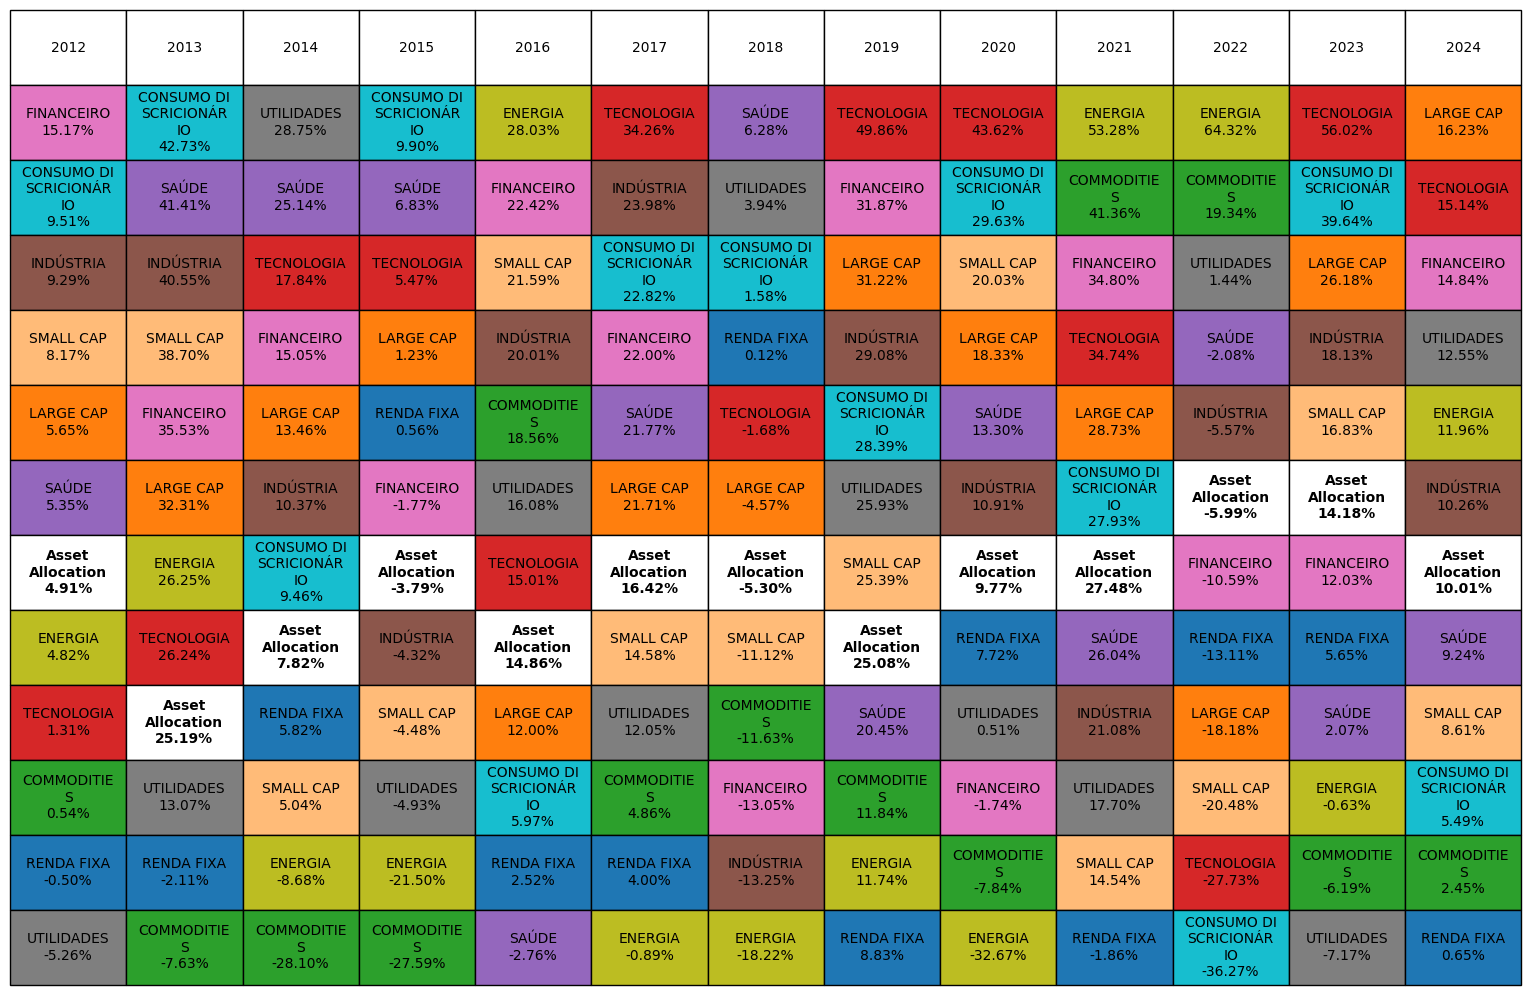

In [2]:
periodos  = tabela.columns
colunas = []
for i in range(len(tabela.columns)):
    temp = tabela.iloc[:,i].sort_values(ascending=False)
    temp = pd.DataFrame(temp)
    temp =  temp.apply(lambda x: x.index + "                   " + x.apply(lambda y: f"{y:.2%}"))
    temp = temp.reset_index()
    temp = temp.iloc[:,1]
    colunas.append(temp)
    
tabela_periodica = pd.concat(colunas,ignore_index=True,axis=1)
tabela_periodica.columns = periodos



#######################################################################################################
###################################!!!!PONTO IMPORTANTE!!!!############################################
########  AQUI É PRECISO ESCOLHER AS CORES E ESTILO DE FONTE PARA CADA ATIVO############################
#######################################################################################################

# Definir as cores para cada classe
# Cores para cada setor
## importante se atentar para o uso de cores com código hexadecimal e o dicionário colors tem que ter o mesmo tamanho do tickers
## Caso utilize dados próprios lembre-se de que os nomes das classes devem ser iguais aos da tabela e iguais em todos os dicionários

color_map =  {
    'RENDA FIXA': '#1f77b4',
    'LARGE CAP': '#ff7f0e',
    'SMALL CAP': '#ffbb78',
    'COMMODITIES': '#2ca02c',
    'TECNOLOGIA': '#d62728',
    'SAÚDE': '#9467bd',
    'INDÚSTRIA': '#8c564b',
    'FINANCEIRO': '#e377c2',
    'ENERGIA': '#bcbd22',
    'CONSUMO DISCRICIONÁRIO': '#17becf',
    'UTILIDADES': '#7f7f7f',
    'Asset Allocation' :'white'
}
# # Definir as cores da fonte
font_color_map = {
    'RENDA FIXA': 'black',
    'LARGE CAP': 'black',
    'SMALL CAP': 'black',
    'COMMODITIES': 'black',
    'TECNOLOGIA': 'black',
    'SAÚDE': 'black',
    'INDÚSTRIA': 'black',
    'FINANCEIRO': 'black',
    'ENERGIA': 'black',
    'CONSUMO DISCRICIONÁRIO': 'black',
    'UTILIDADES': 'black',
    'Asset Allocation' :'black'
}
# # Definir o estilo da fonte
font_style_map = {
    'RENDA FIXA': 'regular',
    'LARGE CAP': 'regular',
    'SMALL CAP': 'regular',
    'COMMODITIES': 'regular',
    'TECNOLOGIA': 'regular',
    'SAÚDE': 'regular',
    'INDÚSTRIA': 'regular',
    'FINANCEIRO': 'regular',
    'ENERGIA': 'regular',
    'CONSUMO DISCRICIONÁRIO': 'regular',
    'UTILIDADES': 'regular',
    'Asset Allocation' :'bold'
}
#######################################################################################################
#######################################################################################################


# Função para quebrar texto
def wrap_text(text, width):
    return '\n'.join(textwrap.wrap(text, width))

# Criar a tabela com matplotlib
fig, ax = plt.subplots(figsize=(6, 6)) # Ajustar o tamanho geral da tabela
ax.axis('tight')
ax.axis('off')

# Ajustar o texto nas células
wrapped_data = tabela_periodica.applymap(lambda x: wrap_text(str(x), 10))  # Ajustar o valor de largura conforme necessário

# Criar a tabela
table = ax.table(cellText=wrapped_data.values, colLabels=tabela_periodica.columns, cellLoc='center', loc='center')

# Ajustar o tamanho da fonte
table.auto_set_font_size(False)
table.set_fontsize(10)

# Ajustar manualmente a largura das colunas
col_widths = [0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25]  # Defina a largura desejada para cada coluna

for key in table.get_celld().keys():
    row, col = key
    cell = table.get_celld()[(row, col)]
    if col < len(col_widths):  # Ignorar a linha do cabeçalho
        cell.set_width(col_widths[col])

# Colorir as células conforme o color_map e ajustar a fonte conforme font_color_map e font_style_map
for i, row in tabela_periodica.iterrows():
    for j, col in enumerate(tabela_periodica.columns):
        value = tabela_periodica.at[i, col]
        bg_color = 'white'  # Default background color
        font_color = 'black'  # Default font color
        font_weight = 'regular'  # Default font weight
        for key in color_map.keys():
            if key in str(value):  # Verificar substring
                bg_color = color_map[key]
                font_color = font_color_map[key]
                font_weight = font_style_map[key]
                break
        cell = table[(i+1, j)]
        cell.set_facecolor(bg_color)
        cell.set_text_props(color=font_color, weight=font_weight)

# Ajustar altura das linhas
table.scale(1, 4.5)  # ajuste a altura das linhas 

plt.show()


In [9]:
!jupyter --version





Selected Jupyter core packages...
IPython          : 8.14.0
ipykernel        : 6.25.1
ipywidgets       : not installed
jupyter_client   : 7.4.9
jupyter_core     : 5.3.1
jupyter_server   : 2.14.2
jupyterlab       : 4.2.4
nbclient         : 0.10.0
nbconvert        : 7.16.4
nbformat         : 5.9.2
notebook         : 7.2.1
qtconsole        : not installed
traitlets        : 5.9.0
